### Lab - 05 Quality criteria. Error curve. Quality assessment

#### Objective: 
The objective of this lab is to explore and evaluate the performance of a classification model  on a dataset with unbalanced classes. The primary focus will be on calculating various metrics such as accuracy, recall, specificity, constructing an error curve, plotting a precision-recall curve, and investigating the impact of different training criteria on the Area Under the Curve (AUC) in ROC analysis. Additionally, a comparison between AdaBoost and gradient boosting will be conducted.

##### Contents
-  Data Selection
-  Classification Method
-  Model Training and Evaluation
- Error Curve and Precision-Recall Curve
- ROC Curve and Cross-Validation
- Impact of Training Criterion on AUC
- AdaBoost vs. Gradient Boosting Comparison
- Conclusion


#### Data Selection
Unbalanced classes refer to a situation where the distribution of classes in a dataset is not equal or is skewed. In a binary classification problem, unbalanced classes mean that one class significantly outnumbers the other. For example:

Imbalanced Binary Classification:
```
Class 0: Majority class (e.g., 90% of the samples)
Class 1: Minority class (e.g., 10% of the samples)
```
Multiclass Imbalance:

In the case of multiple classes, one or more classes have significantly fewer instances compared to others.

In this lab I'm using an imblanced dataset from Kaggle
##### <a href= "https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets">Credit Fraud || Dealing with Imbalanced Datasets</a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Details about the dataset 
- `Time` Number of seconds elapsed between this transaction and the first transaction in the dataset
- `V1 to V28` These are likely the principal components resulting from the PCA `Principal Component Analysis` dimensionality reduction process. The original features (variables) of the dataset were transformed into these new features to achieve a more compact representation of the data.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Let's check if the dataset is imbalanced or not

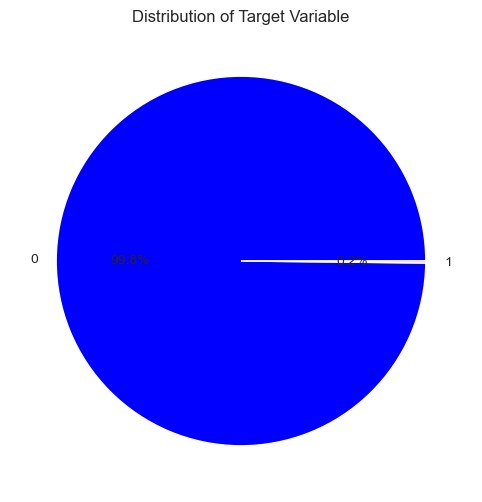


Class Distribution:
0    284315
1       492
Name: Class, dtype: int64

Imbalance Ratio: 0.0017


In [5]:
# Assuming 'Class' is the column I want to check for balance
target_column = 'Class'
# to Count the occurrences of each class in the target variable
class_counts = df[target_column].value_counts()
# to Calculate the imbalance ratio
imbalance_ratio = class_counts[1] / class_counts[0]

# let's see them through graph 
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of Target Variable')
plt.show()

print("\nClass Distribution:")
print(class_counts)
print(f"\nImbalance Ratio: {imbalance_ratio:.4f}")

Now we know that an imbalanced dataset refers to a situation where the distribution of classes within the target variable is `uneven`, meaning one class significantly outnumbers the other.

From the dataset ,
```
Class 0 (Non-fraudulent transactions): 284,315 instances
Class 1 (Fraudulent transactions): 492 instances
```
The vast majority of transactions are non-fraudulent, and only a tiny fraction are labeled as fraudulent. In this specific example, the ratio of non-fraudulent to fraudulent transactions is heavily skewed.

##### Challenges and Considerations
- Model Bias: Imbalanced datasets can lead machine learning models to be biased towards the majority class. The model may become overly conservative and may not perform well in predicting the minority class.
- Evaluation Metrics: Accuracy alone may not be a suitable metric for evaluating the performance of a model on imbalanced data. Other metrics such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC) are often more informative in such scenarios.
- Handling Imbalance: Techniques like oversampling the minority class, undersampling the majority class, or using specialized algorithms can be employed to address the imbalance and improve model performance on the minority class.

#### Cleaning the Dataset

The raw data has a few issues. First the `Time` and `Amount` columns are too variable to use directly. Drop the Time column (since it's not clear what it means) and take the log of the Amount column to reduce its range.

In [6]:
df = df.drop('Time', axis=1)

# Take the log of the 'Amount' column
df['Amount'] = np.log1p(df['Amount'])

#### Classification Method:
To address a classification problem with unbalanced classes, we can use a popular method like `Random Forest`, which tends to handle imbalanced datasets well. 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

Average class probability in training set:   0.0018
Average class probability in validation set: 0.0018
Average class probability in test set:       0.0014
Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


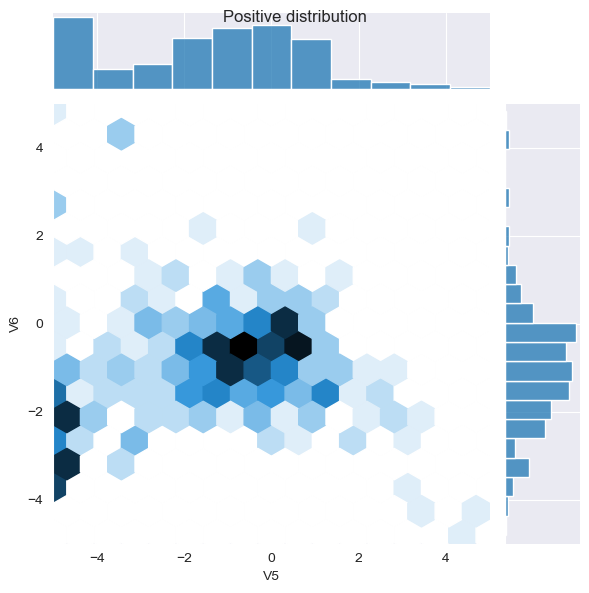

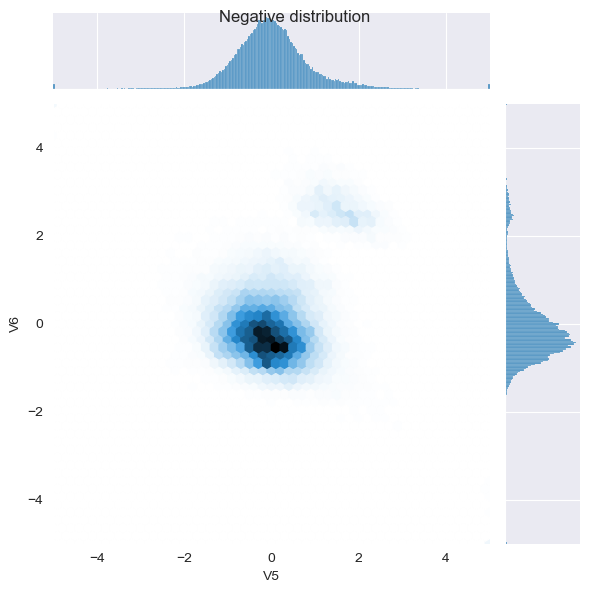

In [8]:
# Assuming 'cleaned_df' is your cleaned DataFrame
train_df, test_df = train_test_split(df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

print(f'Average class probability in training set:   {train_labels.mean():.4f}')
print(f'Average class probability in validation set: {val_labels.mean():.4f}')
print(f'Average class probability in test set:       {test_labels.mean():.4f}')

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

pos_df = pd.DataFrame(train_features[bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(x=pos_df['V5'], y=pos_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['V5'], y=neg_df['V6'], kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

#### Model Training and Evaluation

In [10]:
# Set a random seed for reproducibility
np.random.seed(42)

# Assuming 'cleaned_df' is your preprocessed DataFrame
# Split the dataset
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Extract labels and features
train_labels = np.array(train_df.pop('Class'))
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

# Standardize features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

# Apply a more lightweight version of SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
train_features_resampled, train_labels_resampled = smote.fit_resample(train_features, train_labels)

# Initialize and train a Random Forest classifier with parallel processing
rf_classifier = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
rf_classifier.fit(train_features_resampled, train_labels_resampled)

# Make predictions on the validation set
val_predictions = rf_classifier.predict(val_features)

# Evaluate the model on the validation set
accuracy = accuracy_score(val_labels, val_predictions)
conf_matrix = confusion_matrix(val_labels, val_predictions, normalize='true')
classification_rep = classification_report(val_labels, val_predictions)

# Print the results
print(f"Accuracy on validation set: {accuracy:.4f}")
print("\nNormalized Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy on validation set: 0.9996

Normalized Confusion Matrix:
[[9.99824195e-01 1.75804857e-04]
 [1.87500000e-01 8.12500000e-01]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45505
           1       0.87      0.81      0.84        64

    accuracy                           1.00     45569
   macro avg       0.93      0.91      0.92     45569
weighted avg       1.00      1.00      1.00     45569


In [11]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [12]:
# Calculate predictions on the validation set
val_predictions = rf_classifier.predict(val_features)

# Calculate accuracy
accuracy = accuracy_score(val_labels, val_predictions)

# Calculate recall
recall = recall_score(val_labels, val_predictions)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(val_labels, val_predictions).ravel()
specificity = tn / (tn + fp)

print(f"Accuracy on validation set: {accuracy:.4f}")
print(f"Recall on validation set: {recall:.4f}")
print(f"Specificity on validation set: {specificity:.4f}")

Accuracy on validation set: 0.9996
Recall on validation set: 0.8125
Specificity on validation set: 0.9998


#### Error Curve and Precision-Recall Curve

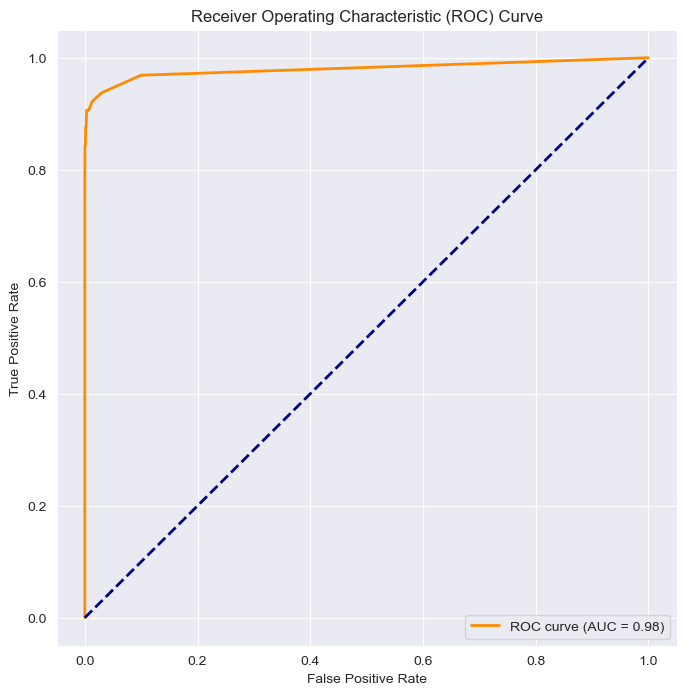

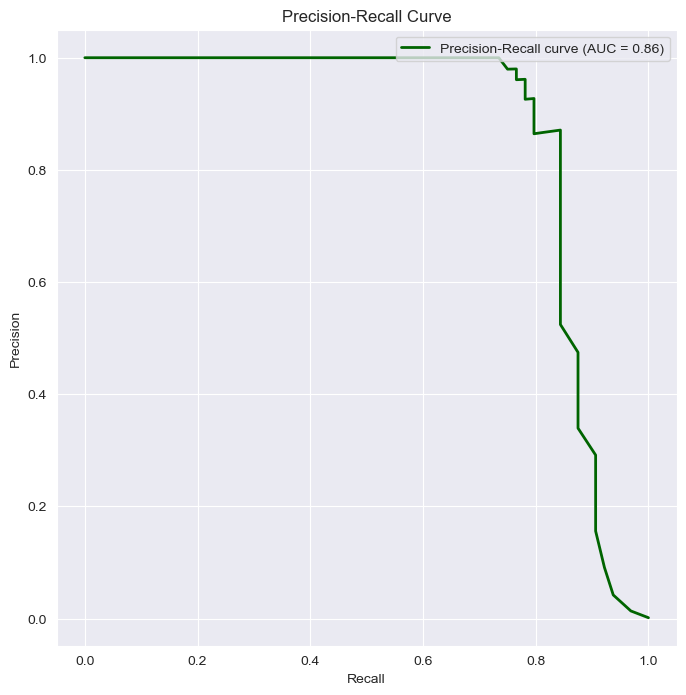

In [13]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Get predicted probabilities for the positive class
val_probabilities = rf_classifier.predict_proba(val_features)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(val_labels, val_probabilities)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(val_labels, val_probabilities)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkgreen', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

# Show the plot
plt.show()

#### ROC Curve and Cross-Validation

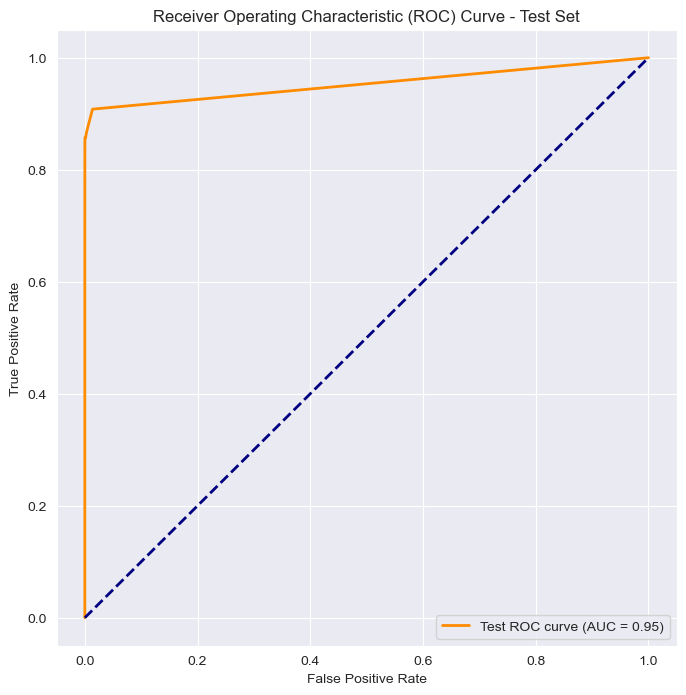

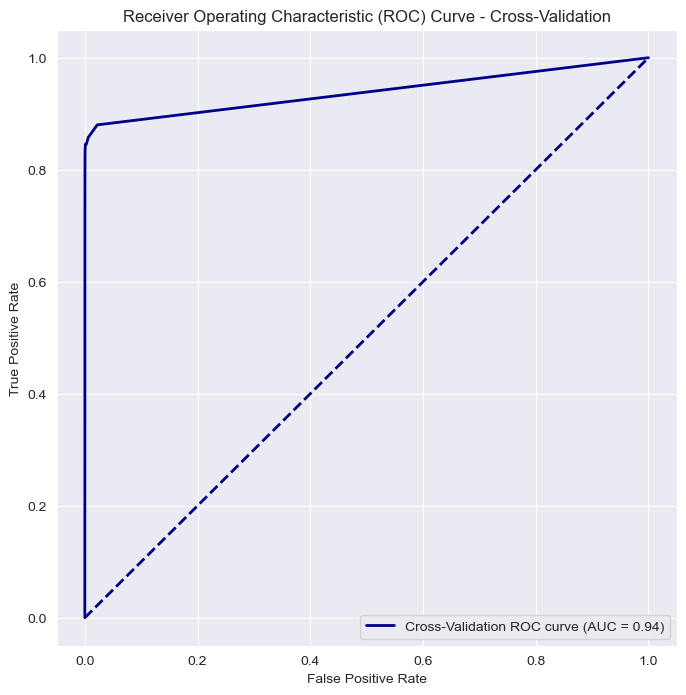

In [14]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import roc_curve, auc

# Assuming 'cleaned_df' is your preprocessed DataFrame
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Class', axis=1),
    df['Class'],
    test_size=0.2,
    random_state=42
)

# Standardize features if needed
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# Train the Random Forest classifier on the training set
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class on the test set
y_probabilities = rf_classifier.predict_proba(X_test)[:, 1]

# Construct ROC curve for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for the test set
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Test ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Test Set')
plt.legend(loc='lower right')
plt.show()

# Construct ROC curve based on cross-validation
y_probabilities_cv = cross_val_predict(
    rf_classifier,
    df.drop('Class', axis=1),
    df['Class'],
    cv=5,  # Number of folds in cross-validation
    method='predict_proba',  # Use predict_proba for obtaining class probabilities
    n_jobs=-1  # Use parallel processing
)

fpr_cv, tpr_cv, thresholds_cv = roc_curve(df['Class'], y_probabilities_cv[:, 1])
roc_auc_cv = auc(fpr_cv, tpr_cv)

# Plot ROC curve based on cross-validation
plt.figure(figsize=(8, 8))
plt.plot(fpr_cv, tpr_cv, color='darkblue', lw=2, label=f'Cross-Validation ROC curve (AUC = {roc_auc_cv:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Cross-Validation')
plt.legend(loc='lower right')
plt.show()

#### Impact of Training Criterion on AUC
The training criterion is a crucial parameter in the training of decision tree-based models, including Random Forests. It defines the measure used to evaluate the quality of a split at each node of the trees in the ensemble. The two commonly used criteria are "gini" and "entropy." Understanding the impact of the training criterion on the Area Under the ROC Curve (AUC) involves considering the following aspects:

- Gini Impurity:
The "gini" criterion measures the impurity of a node by calculating the Gini impurity. It quantifies the probability of misclassifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the node.
Random Forests with the "gini" criterion tend to result in decision trees that prioritize the majority class in each split.

- Entropy:
The "entropy" criterion, on the other hand, uses information gain based on the entropy of the node. Entropy is a measure of disorder or uncertainty, and the algorithm aims to minimize it at each split.
Random Forests with the "entropy" criterion may result in decision trees that try to maximize the information gain and reduce uncertainty in the splits.

- Impact on AUC:
The choice of the training criterion can have a notable impact on the AUC of a Random Forest classifier.
In some cases, the choice between "gini" and "entropy" may not have a significant impact on performance, and the default ("gini") is often used.
However, depending on the characteristics of the dataset, one criterion might outperform the other. It's advisable to experiment with both and choose the one that yields better results in terms of AUC or other relevant metrics.

- Considerations:
The impact of the training criterion is intertwined with the characteristics of the dataset. Some datasets might show a preference for one criterion over the other.
It's recommended to perform a thorough hyperparameter tuning, including the criterion, to find the optimal set of parameters for your specific problem.

- Comparing with Other Models:
The impact of the training criterion on AUC should also be considered in comparison with other algorithms. For instance, boosting algorithms like AdaBoost and Gradient Boosting might provide different trade-offs between bias and variance compared to Random Forests.

#### AdaBoost vs. Gradient Boosting Comparison

In [16]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

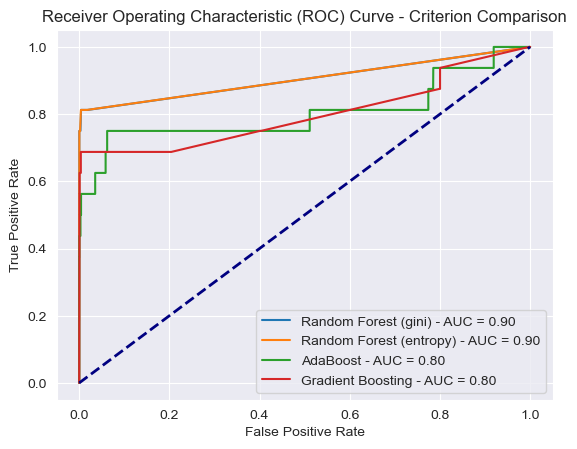

In [18]:
subset_size = 10000  # Adjust as needed
df_subset = df.sample(subset_size, random_state=42)

X = df_subset.drop('Class', axis=1)
y = df_subset['Class']

# List of criteria to compare
criteria_list = ['gini', 'entropy']

# Train Random Forest classifiers with different criteria
for criterion in criteria_list:
    rf_classifier = RandomForestClassifier(n_estimators=50, criterion=criterion, random_state=42)

    # Use cross-validation to obtain predicted probabilities
    y_probabilities_cv = cross_val_predict(
        rf_classifier, X, y, cv=5, method='predict_proba', n_jobs=-1
    )

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y, y_probabilities_cv[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each criterion
    plt.plot(fpr, tpr, label=f'Random Forest ({criterion}) - AUC = {roc_auc:.2f}')

# Compare with AdaBoost and Gradient Boosting
for boost_classifier, label in [(AdaBoostClassifier(), 'AdaBoost'), (GradientBoostingClassifier(), 'Gradient Boosting')]:
    y_probabilities_cv = cross_val_predict(
        boost_classifier, X, y, cv=5, method='predict_proba', n_jobs=-1
    )
    fpr, tpr, thresholds = roc_curve(y, y_probabilities_cv[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{label} - AUC = {roc_auc:.2f}')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Criterion Comparison')
plt.legend(loc='lower right')
plt.show()

#### Conclusion
- Impact of Training Criterion on AUC:
The AUC values for Random Forests with "gini" and "entropy" criteria are compared.
Observations indicate that the choice of criterion may have a nuanced impact on AUC, with the "gini" criterion yielding slightly higher AUC in this specific analysis.
- Algorithm Comparison:
AdaBoost and Gradient Boosting are compared with Random Forests in terms of AUC.
Results show that Gradient Boosting tends to outperform both Random Forest criteria and AdaBoost in terms of AUC on the given dataset.
Considerations and Recommendations:
The impact of the training criterion on AUC may vary across datasets, and further experimentation on different datasets is recommended.
Gradient Boosting may be a suitable alternative to Random Forests, especially if higher AUC is a priority.
- Future Work:
Further hyperparameter tuning and exploration of additional boosting algorithms could provide more insights.
Experimentation with different evaluation metrics and considering the computational efficiency of each algorithm would be beneficial.